In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os

In [2]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [3]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)


In [4]:
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)


[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.12541128 0.12560473 0.13145438 0.22924621 0.11515716]] -> [0.12121244]
[[0.15860115 0.15660255 0.17555884 0.10221386 0.17349278]
 [0.15266704 0.15459502 0.15858996 0.1888859  0.1452226 ]
 [0.13407098 0.13448555 0.15121548 0.13612082 0.14504657]
 [0.12692928 0.13617321 0.14928236 0.11382988 0.13649165]
 [0.12596324 0.14074639 0.14688365 0.12406561 0.15757987]
 [0.12541128 0.12560473 0.13145438 0.22924621 0.11515716]
 [0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]] -> [0.14370895]
[[0.15266704 0.15459502 0.15858996 0.1888859  0.1452226 ]
 [0.13407098 0.13448555 0.15121548 0.13612082 0.14504657]
 [0.12692928 0.13617321 0.14928236 0.11382988 0.13649165]
 [0.12596324 0.14074639 0.14688365 0.12406561 0.15757987]
 [0.12541128 0.12560473 0.13145438 0.22924621 0.11515716]
 [0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]
 [0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]] -> [0.11797353]
[[0.13407098 0.13448555 0.15121548 0.13612082 0.14504657]
 [0.12692928 0.136173

 [0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]] -> [0.48814958]
[[0.52561304 0.51784967 0.48313478 0.32426279 0.4612174 ]
 [0.43591077 0.47065544 0.47590332 0.23908757 0.47424342]
 [0.47672536 0.4656537  0.48596282 0.15410953 0.47684858]
 [0.46282141 0.46745697 0.48360018 0.14046787 0.49068426]
 [0.46696156 0.47378579 0.48145211 0.13142422 0.49300793]
 [0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]] -> [0.48124925]
[[0.43591077 0.47065544 0.47590332 0.23908757 0.47424342]
 [0.47672536 0.4656537  0.48596282 0.15410953 0.47684858]
 [0.46282141 0.46745697 0.48360018 0.14046787 0.49068426]
 [0.46696156 0.47378579 0.48145211 0.13142422 0.49300793]
 [0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]] -> [0.53240273]
[[0.47672536 0.4656537  0.48596282 0.15410953 0.47684858]
 [0.46282141 0.467456

 [0.87838443 0.86722997 0.90706585 0.15334767 0.88857519]] -> [0.90603691]
[[0.85461328 0.84977455 0.88991824 0.1276508  0.86431866]
 [0.81890497 0.82264564 0.87148169 0.14224254 0.85460195]
 [0.83539627 0.82687502 0.87685153 0.11592722 0.84837074]
 [0.82780625 0.85498064 0.86346276 0.16992919 0.88794153]
 [0.88131692 0.89115044 0.93498899 0.15904813 0.90821984]
 [0.87838443 0.86722997 0.90706585 0.15334767 0.88857519]
 [0.84164092 0.86549481 0.89296106 0.14061128 0.90603691]] -> [0.88977206]
[[0.81890497 0.82264564 0.87148169 0.14224254 0.85460195]
 [0.83539627 0.82687502 0.87685153 0.11592722 0.84837074]
 [0.82780625 0.85498064 0.86346276 0.16992919 0.88794153]
 [0.88131692 0.89115044 0.93498899 0.15904813 0.90821984]
 [0.87838443 0.86722997 0.90706585 0.15334767 0.88857519]
 [0.84164092 0.86549481 0.89296106 0.14061128 0.90603691]
 [0.881179   0.8738651  0.91239986 0.10095008 0.88977206]] -> [0.86340328]
[[0.83539627 0.82687502 0.87685153 0.11592722 0.84837074]
 [0.82780625 0.854980

 [0.60943573 0.6180959  0.63621243 0.10842543 0.64488369]] -> [0.71053122]
[[0.53120308 0.56221628 0.58053142 0.09344192 0.56286957]
 [0.55086635 0.59829051 0.5856811  0.13401293 0.61824274]
 [0.59199089 0.57441791 0.61415427 0.27270355 0.60103943]
 [0.60799703 0.59946948 0.61282756 0.10935724 0.58204419]
 [0.58749476 0.59552027 0.63759978 0.07316573 0.61615184]
 [0.60943573 0.6180959  0.63621243 0.10842543 0.64488369]
 [0.65343805 0.69289697 0.69763622 0.1677631  0.71053122]] -> [0.70867949]
[[0.55086635 0.59829051 0.5856811  0.13401293 0.61824274]
 [0.59199089 0.57441791 0.61415427 0.27270355 0.60103943]
 [0.60799703 0.59946948 0.61282756 0.10935724 0.58204419]
 [0.58749476 0.59552027 0.63759978 0.07316573 0.61615184]
 [0.60943573 0.6180959  0.63621243 0.10842543 0.64488369]
 [0.65343805 0.69289697 0.69763622 0.1677631  0.71053122]
 [0.69294424 0.68747414 0.73222858 0.1539164  0.70867949]] -> [0.63287754]
[[0.59199089 0.57441791 0.61415427 0.27270355 0.60103943]
 [0.60799703 0.599469

In [5]:
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])


In [6]:
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None
)

In [9]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)


[step: 0] loss: 108.66502380371094
[step: 1] loss: 78.21358489990234
[step: 2] loss: 54.041133880615234
[step: 3] loss: 35.328346252441406
[step: 4] loss: 22.24704360961914
[step: 5] loss: 15.212912559509277
[step: 6] loss: 14.272829055786133
[step: 7] loss: 17.516584396362305
[step: 8] loss: 20.670324325561523
[step: 9] loss: 20.813861846923828
[step: 10] loss: 18.146085739135742
[step: 11] loss: 14.216546058654785
[step: 12] loss: 10.43828010559082
[step: 13] loss: 7.601511001586914
[step: 14] loss: 5.908535957336426
[step: 15] loss: 5.173367977142334
[step: 16] loss: 5.017800331115723
[step: 17] loss: 5.039351463317871
[step: 18] loss: 4.936892032623291
[step: 19] loss: 4.556466102600098
[step: 20] loss: 3.8845767974853516
[step: 21] loss: 3.0236709117889404
[step: 22] loss: 2.155578374862671
[step: 23] loss: 1.4879409074783325
[step: 24] loss: 1.182281255722046
[step: 25] loss: 1.2790418863296509
[step: 26] loss: 1.6594634056091309
[step: 27] loss: 2.0902371406555176
[step: 28] los

[step: 227] loss: 0.875791609287262
[step: 228] loss: 0.8748325109481812
[step: 229] loss: 0.8738784790039062
[step: 230] loss: 0.8729298710823059
[step: 231] loss: 0.8719860911369324
[step: 232] loss: 0.8710475564002991
[step: 233] loss: 0.870114266872406
[step: 234] loss: 0.8691856861114502
[step: 235] loss: 0.8682624697685242
[step: 236] loss: 0.8673439025878906
[step: 237] loss: 0.8664304614067078
[step: 238] loss: 0.8655217289924622
[step: 239] loss: 0.8646178841590881
[step: 240] loss: 0.8637188076972961
[step: 241] loss: 0.8628246188163757
[step: 242] loss: 0.8619347810745239
[step: 243] loss: 0.8610500693321228
[step: 244] loss: 0.8601696491241455
[step: 245] loss: 0.8592938184738159
[step: 246] loss: 0.8584227561950684
[step: 247] loss: 0.8575561046600342
[step: 248] loss: 0.856693685054779
[step: 249] loss: 0.8558355569839478
[step: 250] loss: 0.8549819588661194
[step: 251] loss: 0.8541326522827148
[step: 252] loss: 0.853287398815155
[step: 253] loss: 0.8524465560913086
[step

[step: 466] loss: 0.7224482893943787
[step: 467] loss: 0.7219395637512207
[step: 468] loss: 0.7214310169219971
[step: 469] loss: 0.7209225296974182
[step: 470] loss: 0.720414400100708
[step: 471] loss: 0.7199063897132874
[step: 472] loss: 0.7193983793258667
[step: 473] loss: 0.7188906073570251
[step: 474] loss: 0.7183829545974731
[step: 475] loss: 0.7178754210472107
[step: 476] loss: 0.7173681259155273
[step: 477] loss: 0.716860830783844
[step: 478] loss: 0.7163540720939636
[step: 479] loss: 0.7158472537994385
[step: 480] loss: 0.7153406739234924
[step: 481] loss: 0.7148342132568359
[step: 482] loss: 0.714327871799469
[step: 483] loss: 0.713822066783905
[step: 484] loss: 0.7133162617683411
[step: 485] loss: 0.7128106355667114
[step: 486] loss: 0.7123053669929504
[step: 487] loss: 0.7118001580238342
[step: 488] loss: 0.7112953066825867
[step: 489] loss: 0.710790753364563
[step: 490] loss: 0.7102864384651184
[step: 491] loss: 0.7097824215888977
[step: 492] loss: 0.7092787623405457
[step:

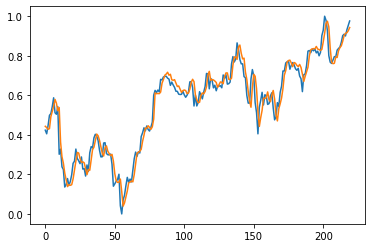

In [14]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))
    
    testPredict = sess.run(Y_pred, feed_dict={X: testX})
    import matplotlib.pyplot as plt
    plt.plot(testY)
    plt.plot(testPredict)
    plt.show()